# Data Visualization: The Truth Behind Police Brutality and Race in the United States
by Aaron Moniz
view full post at https://aaronmoniz.com/?p=219

Importing pandas, matplotlib.pyplot and matplotlib.style

In [474]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style

Importing CSV from link below into Pandas DataFrame data

Article link- Washington Post: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/

Database: https://github.com/washingtonpost/data-police-shootings

In [475]:
data = pd.read_csv(r'C:\Users\aaron\Documents\fatal-police-shootings-data.csv')
data = data.set_index('id')

Filling all empty cells in 'race' column of Pandas DataFrame:

In [476]:
data['race'] = data['race'].fillna('Unknown')

Giving full names to 'race' column of Pandas DataFrame data:

In [477]:
full_race = list(data['race'])

for i in full_race:
    if i == 'W':
        full_race[full_race.index(i)] = 'White'
    elif i == 'B':
        full_race[full_race.index(i)] = 'Black'
    elif i == 'A':
        full_race[full_race.index(i)] = 'Asian'
    elif i == 'N':
        full_race[full_race.index(i)] = 'Native'
    elif i == 'H':
        full_race[full_race.index(i)] = 'Hispanic'
    elif i == 'O':
        full_race[full_race.index(i)] = 'Other'

data['race'] = full_race

Changing all dates to year only in 'date' column of Pandas DataFrame data:

In [501]:
data['date'] = list(map((lambda x: x[0:4]), list(data['date'])))
data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
8,Matthew Hoffman,2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
9,Michael Rodriguez,2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5848,TK TK,2020,shot,gun,32.0,M,Asian,San Diego,CA,False,attack,NaN,False
5849,TK TK,2020,shot,knife,NaN,M,Unknown,Philadelphia,PA,False,other,Not fleeing,False
5850,TK TK,2020,shot,gun,NaN,M,Unknown,Snellville,GA,False,attack,Car,False


Creating Figure # 1 Police Shootings by Race in the US, 2015-2019:

In [479]:
f1 = list(data['race'])
graph1 = pd.Series(list(filter((lambda x: x == 'White' or x == 'Black' or x =='Hispanic' or \
                                x == 'Asian'), f1))).value_counts()

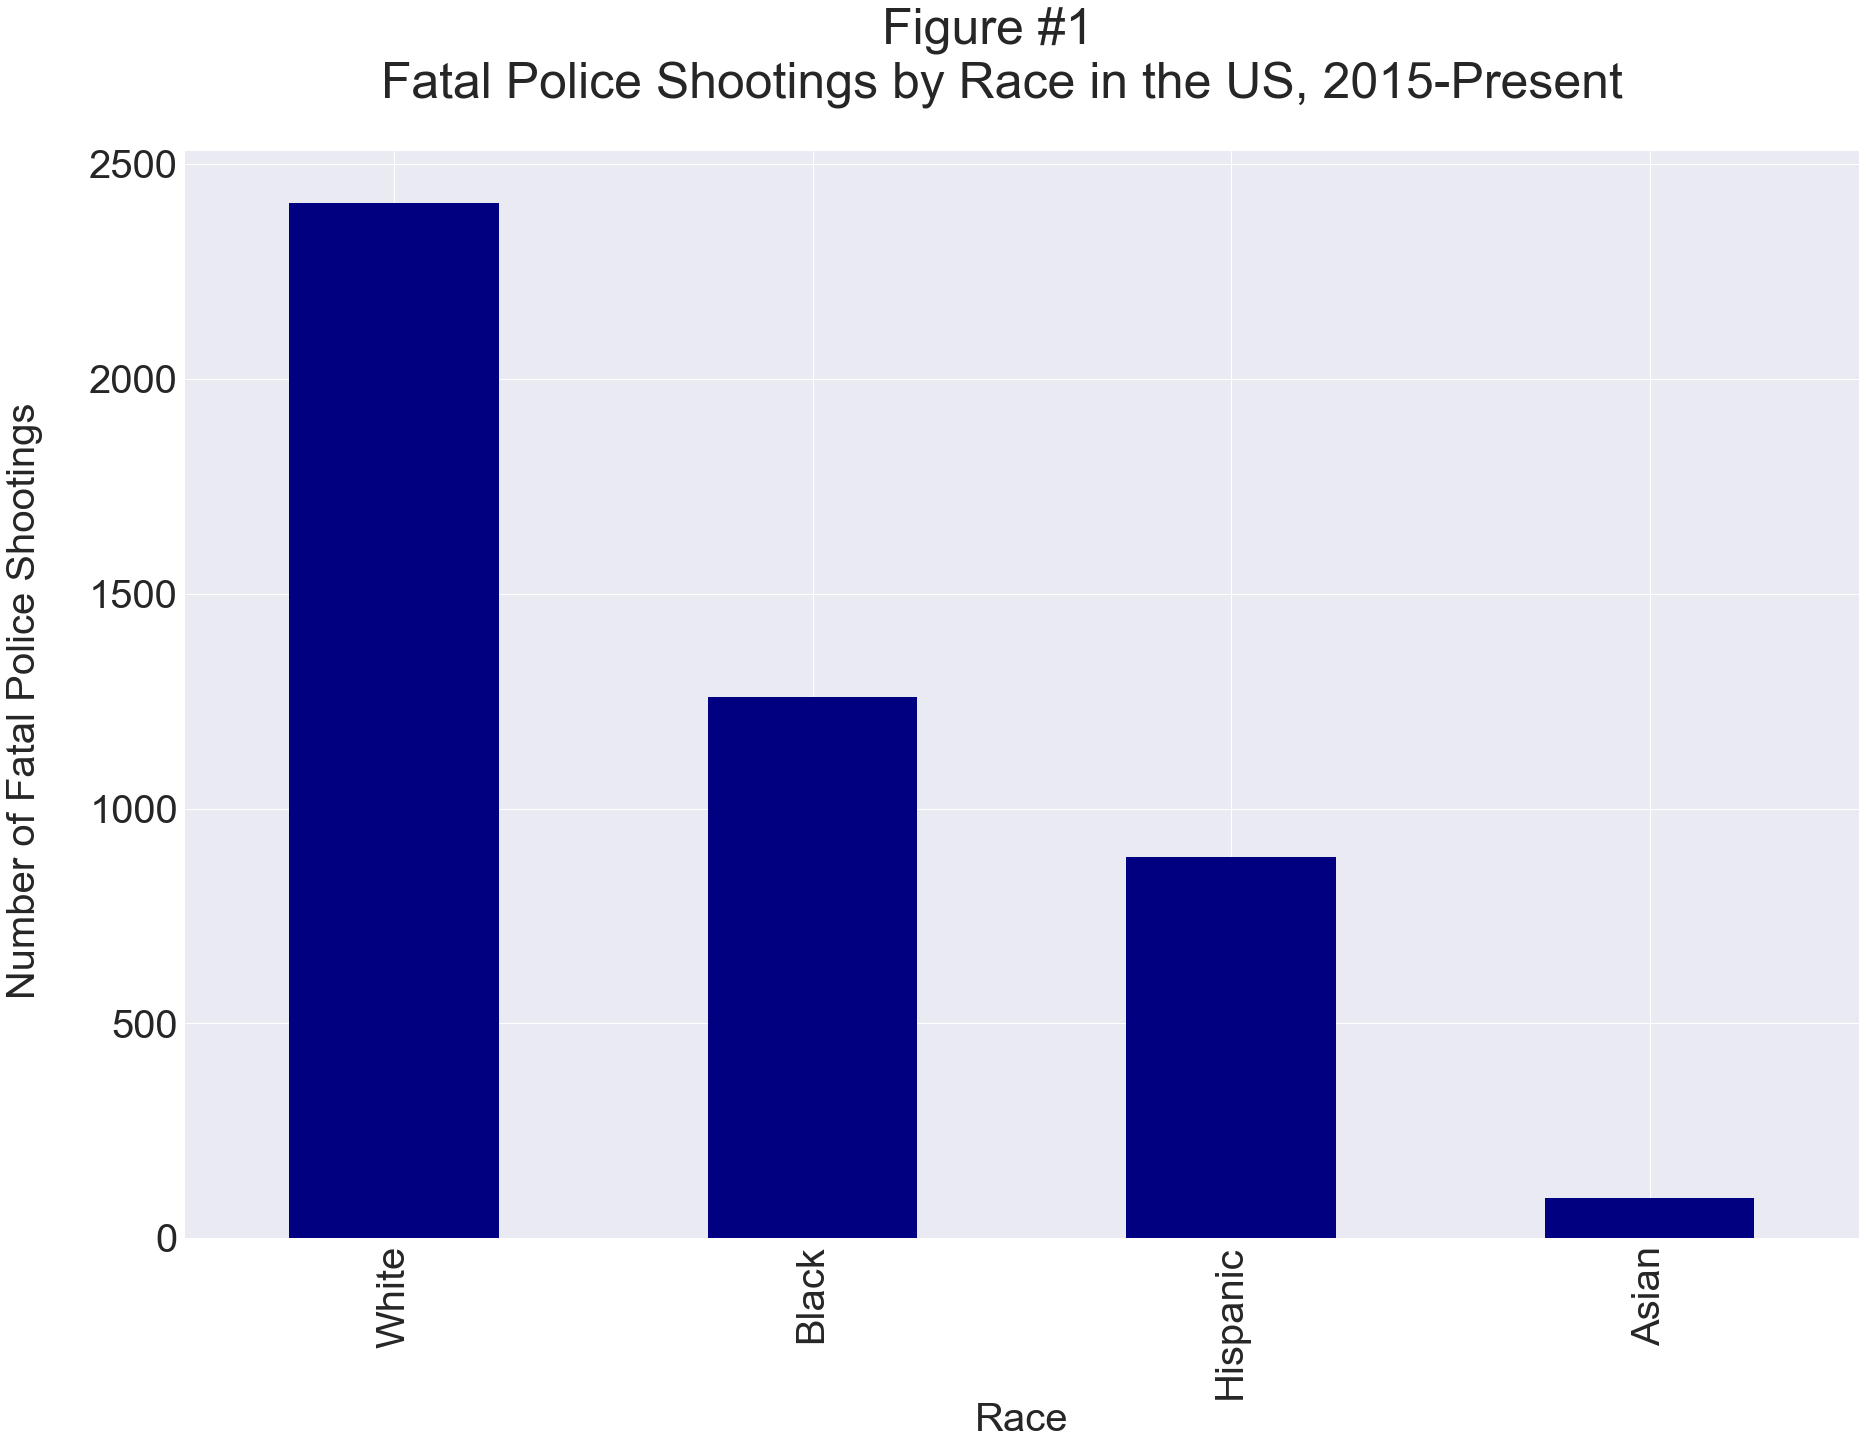

In [541]:
style.use('seaborn')
ax = graph1.plot(kind='bar', figsize=(30, 20), legend=False, color='navy', fontsize=40)
plt.suptitle('Figure #1 \n Fatal Police Shootings by Race in the US, 2015-Present', fontsize=50)
ax.set_xlabel("Race", fontsize=40)
ax.set_ylabel("Number of Fatal Police Shootings \n", fontsize=40)
    
plt.show()

Calculating percentage of killings of each race to one decimal place, formatted_percent_killed:

In [481]:
quantity_killed = 0
killed = list(graph1)
while len(killed) > 0:
    quantity_killed += killed[0]
    killed = killed[1:]
    
f2 = list(graph1)
percent_killed = list(map((lambda x: x / quantity_killed * 100), f2))
formatted_percent_killed = [round(elem, 1) for elem in percent_killed]

Population data taken from the US Census for 2010-2019: https://www.census.gov/quickfacts/fact/table/US/RHI625218

In [482]:
race = ['White', 'Black', 'Hispanic', 'Asian']
poppct = [76.5, 13.4, 18.3, 5.9]
population = pd.Series(poppct, race)
population_statistics = pd.DataFrame(population)
population_statistics.columns = ['pct population']
population_statistics

,pct population
White,76.5
Black,13.4
Hispanic,18.3
Asian,5.9


Creating new DataFrame unarmed_crimes with only unarmed victims:

In [483]:
f3 = (data['armed'] == 'unarmed')
unarmed_crimes = data[f3]

Creating Figure # 2- Unarmed Victims of Police Shootings by Race in the US, 2015-2019

In [484]:
f4 = (list(unarmed_crimes['race']))
graph2 = pd.Series(list(filter((lambda x: x == 'White' or x == 'Black' or x =='Hispanic' or \
                                x == 'Asian'), f4))).value_counts()

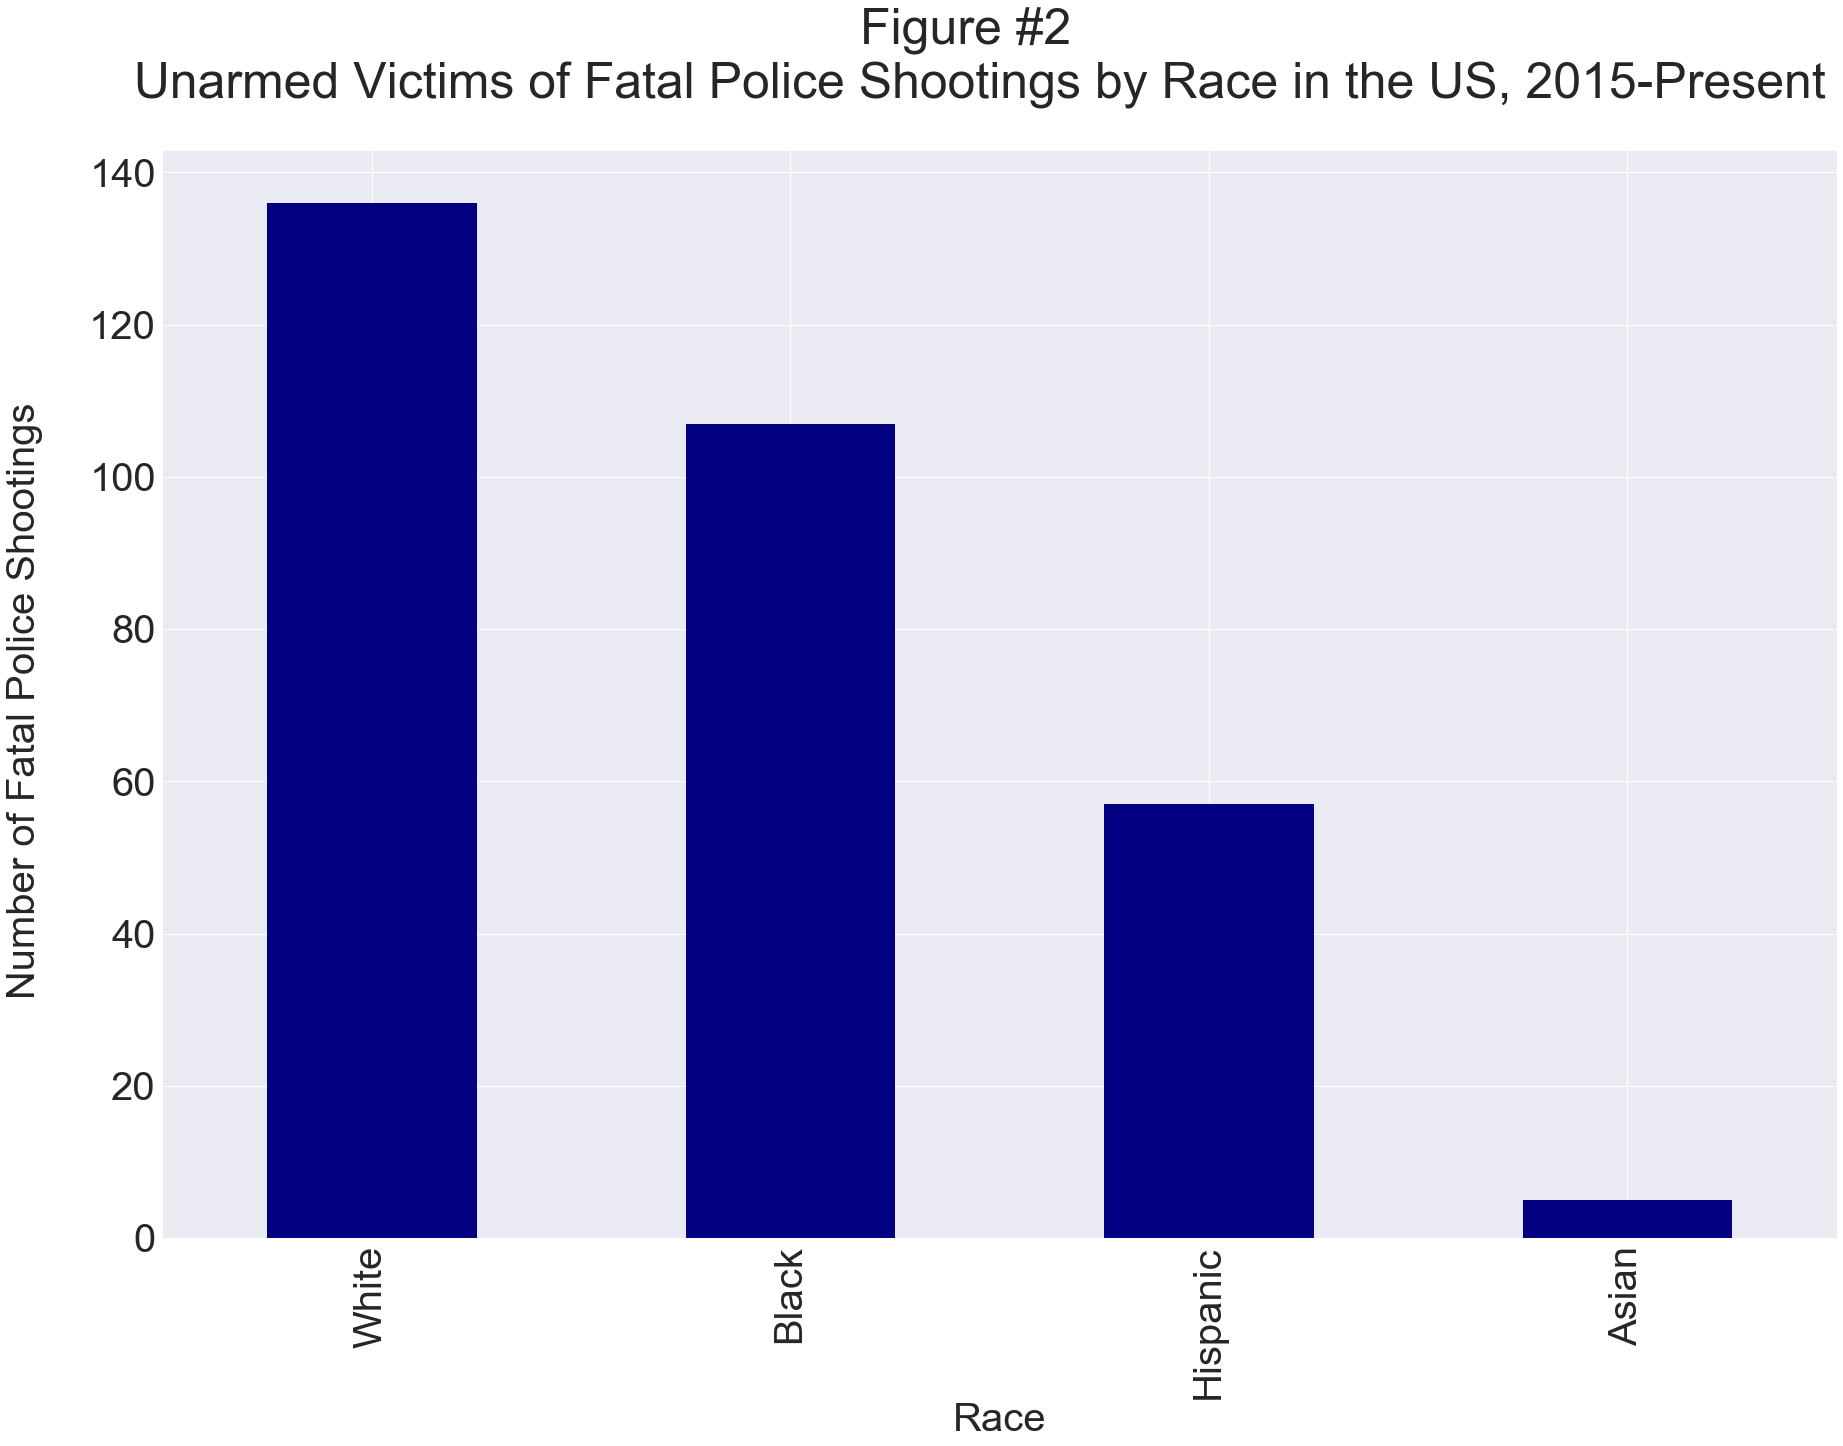

In [542]:
style.use('seaborn')
ax = graph2.plot(kind='bar', figsize=(30, 20), color='navy', fontsize=40)
plt.suptitle('Figure #2 \n Unarmed Victims of Fatal Police Shootings by Race in the US, 2015-Present', fontsize=50)
ax.set_xlabel("Race", fontsize=40)
ax.set_ylabel("Number of Fatal Police Shootings \n", fontsize=40)
plt.show()

Calculating percentage of killings of each race to one decimal place, formatted_percent_unarmed:

In [486]:
quantity_unarmed = 0
unarmed = list(graph3)
while len(unarmed) > 0:
    quantity_unarmed += unarmed[0]
    unarmed = unarmed[1:]

f3 = list(graph3)
percent_unarmed = list(map((lambda x: x / quantity_unarmed * 100), f3))
formatted_percent_unarmed = [round(elem, 1) for elem in percent_unarmed]

Creating new DataFrame process with columns 'population pct', the percentage of the population represented by each race, 'pct killed', the percentage of each race killed, and 'unarmed killings pct', the percentage of each race of unarmed victims.

In [487]:
races = ['White', 'Black', 'Hispanic', 'Asian']
process = pd.DataFrame(races)
process.columns = ['races']
process = process.set_index('races')
process

""
races
White
Black
Hispanic
Asian


In [488]:
process['population pct'] = list(population)
process['pct killed'] = formatted_percent_killed
process['unarmed killings pct'] = formatted_percent_unarmed

Creating Figure # 3- Comparing Percentage Killings by Race to Percentage Population by Race

In [502]:
ratio_killed = process['pct killed'] / process['population pct']
process['all killings'] = [round(elem, 1) for elem in ratio_killed]

ratio_unarmed = process['unarmed killings pct']  / process['population pct']
process['unarmed killings'] = [round(elem, 1) for elem in ratio_unarmed]
process

,population pct,pct killed,unarmed killings pct,all killings,unarmed killings
races,,,,,
White,76.5,51.8,44.6,0.7,0.6
Black,13.4,27.1,35.1,2.0,2.6
Hispanic,18.3,19.1,18.7,1.0,1.0
Asian,5.9,2.0,1.6,0.3,0.3


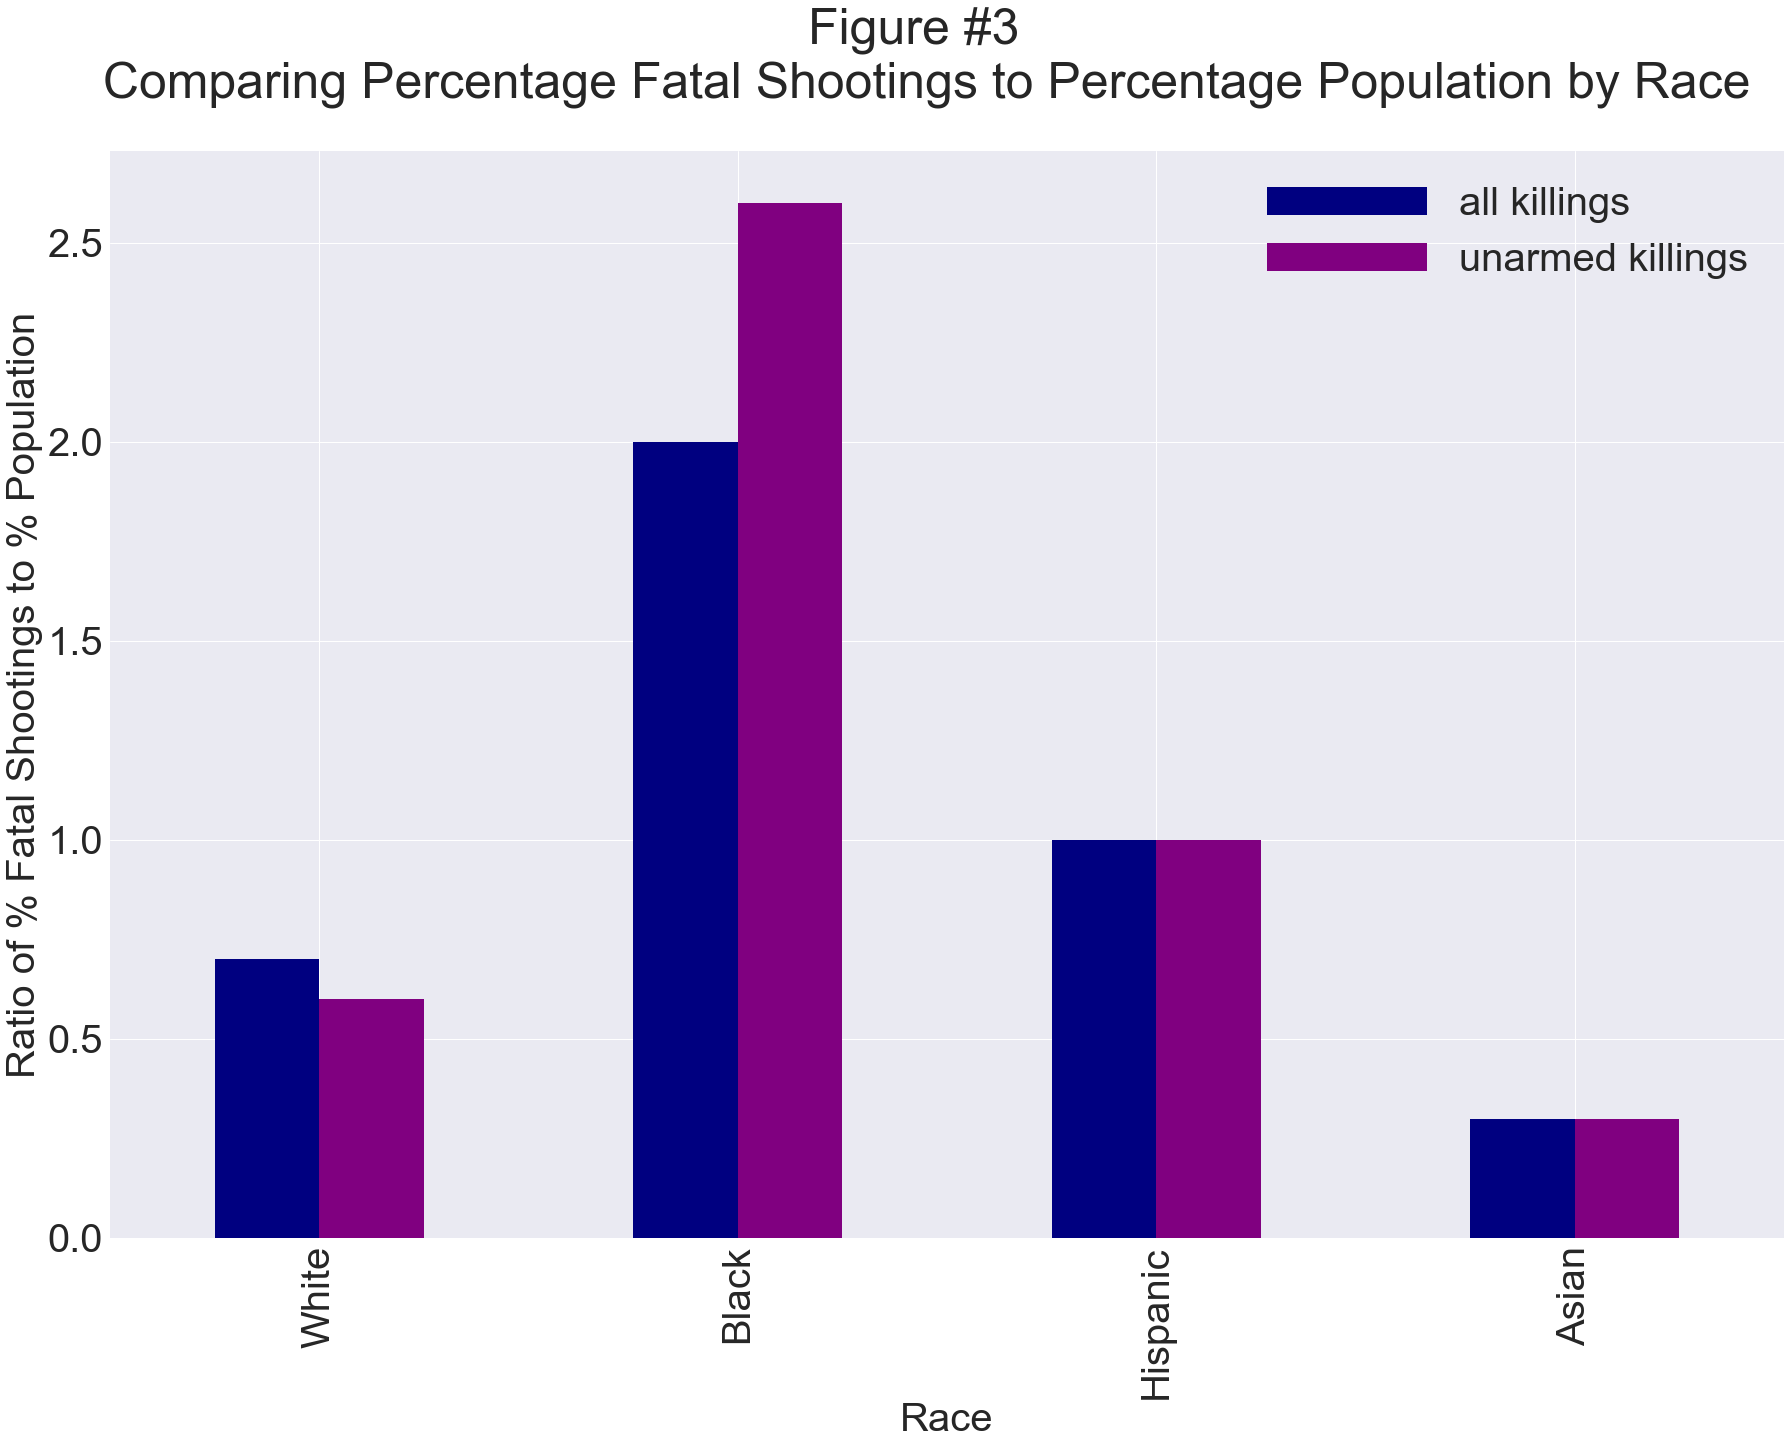

In [546]:
style.use('seaborn')
ax = process[['all killings','unarmed killings']].plot(kind='bar', figsize=(30, 20), legend=True, color=['navy', 'purple'], fontsize=40)
plt.suptitle('Figure #3 \n Comparing Percentage Fatal Shootings to Percentage Population by Race', fontsize=50)
ax.set_xlabel("Race", fontsize=40)
ax.set_ylabel("Ratio of % Fatal Shootings to % Population", fontsize=40)
plt.legend(fontsize=40, handlelength=4)
    
plt.show()

Separating data into five DataFrames, d15, d16, d17, d18, and d19:

In [491]:
f15 = data['date'] == '2015'
d15 = data[f15]

In [492]:
f16 = data['date'] == '2016'
d16 = data[f16]

In [504]:
f17 = data['date'] == '2017'
d17 = data[f17]

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
2177,John McLaughlin,2017,shot,gun,42.0,M,White,Springfield,OH,False,other,Not fleeing,False
2178,Trevon Johnson,2017,shot,knife,17.0,M,Black,Villa Park,IL,True,other,Not fleeing,False
2184,Chad Erik Roberts,2017,shot,gun,35.0,M,White,Woodstock,GA,False,attack,Car,False
2185,Juan Carlos Cuadra,2017,shot,gun,23.0,M,Hispanic,Houston,TX,False,attack,Foot,False
2187,Mark Guirguis,2017,shot,NaN,21.0,M,Black,Allen,TX,False,attack,Car,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Marco Antonio Carlos,2017,shot,gun,31.0,M,Hispanic,Redwood City,CA,False,attack,Not fleeing,False
3257,Heath Wayne Hodges,2017,shot,undetermined,36.0,M,White,Crowell,TX,False,undetermined,NaN,False
3260,Oscar Sandoval,2017,shot,gun,39.0,M,Unknown,Los Angeles,CA,False,other,Not fleeing,False


In [494]:
f18 = data['date'] == '2018'
d18 = data[f18]

In [495]:
f19 = data['date'] == '2019'
d19 = data[f19]

Recombining into DataFrame with yearly statistics:

In [496]:
s15 = d15['race'].value_counts()
s16 = d16['race'].value_counts()
s17 = d17['race'].value_counts()
s18 = d18['race'].value_counts()
s19 = d19['race'].value_counts()

In [497]:
year_stats = pd.DataFrame(s15)
year_stats.columns = [2015]

In [498]:
year_stats[2016] = s16
year_stats[2017] = s17
year_stats[2018] = s18
year_stats[2019] = s19
year_stats

,2015,2016,2017,2018,2019
White,497,465,459,451,370
Black,258,234,223,229,235
Hispanic,172,160,179,165,158
Unknown,29,61,81,107,202
Other,15,11,6,4,9
Asian,14,15,16,21,18
Native,9,16,22,15,12


Creating Figure # 4- Police Killings by Year and Race

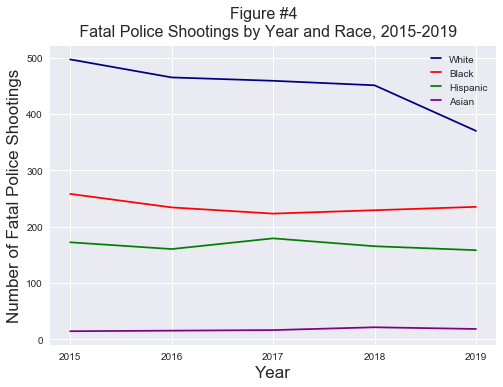

<Figure size 2880x2160 with 0 Axes>

In [566]:
plt.plot(year_stats.iloc[0], color='navy', label = 'White')
plt.plot(year_stats.iloc[1], color='red', label = 'Black' )
plt.plot(year_stats.iloc[2], color='green', label='Hispanic')
plt.plot(year_stats.iloc[5], color='purple', label='Asian')
plt.suptitle('Figure #4 \n Fatal Police Shootings by Year and Race, 2015-2019', size=16)
plt.xlabel('Year', size=17)
plt.ylabel('Number of Fatal Police Shootings', size=17)
plt.legend(fontsize=10, handlelength=1)
plt.rcParams["legend.loc"] = 'upper right' 
plt.figure(figsize=(40,30))
matplotlib.rc('xtick', labelsize=17) 
matplotlib.rc('ytick', labelsize=17)
plt.show()